In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn,rand

In [23]:
import importlib
importlib.reload(stepwisefit)

<module 'stepwisefit' from 'C:\\Users\\szmurlor\\Nextcloud\\Dydaktyka\\Matematyczne modele uczenia maszynowego\\Podrecznik_2022\\Python\\stepwisefit.py'>

In [22]:
import stepwisefit

In [24]:
from stepwisefit import stepwisefit

In [53]:
# Należy pobrać implementację metody z
# https://github.com/mkanai/minimgnt/...
# blob/master/minimgnt/stepwisefit.py

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn,rand
from stepwisefit import stepwisefit

x1 = np.arange(0,8+0.1,0.1).reshape(1,81);
x2 = rand(1,81);
x3 = randn(1,81);
x4 = rand(1,81);
y= (0.5*x1*x2+2*np.sin(x1)*x2-x2**2 + 0.2*rand(1,81))

X= np.concatenate( 
    (x1.T, x2.T,x3.T,x4.T),
    axis=1 );
(b, se, pval, inmodel, stats, 
 nextstep, history) =stepwisefit(X,y)

print(f'B=\n{b}')
print(f'SE=\n{se}')
print(f'PVAL=\n{pval}')
print(f'INMODEL=\n{inmodel}')

B=
[[ 0.17975627]
 [ 1.27486861]
 [ 0.10215329]
 [-0.38231784]]
SE=
[[0.03939934]
 [0.32935371]
 [0.09656387]
 [0.30605408]]
PVAL=
[[1.85259506e-05]
 [2.23892624e-04]
 [2.93416264e-01]
 [2.15381977e-01]]
INMODEL=
[ True  True False False]


# LDA

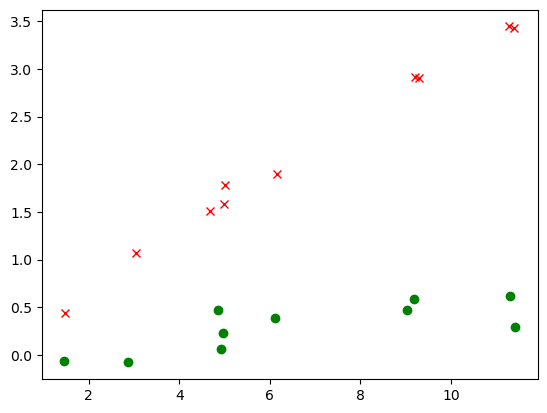

[56.48841202  0.9434439 ]


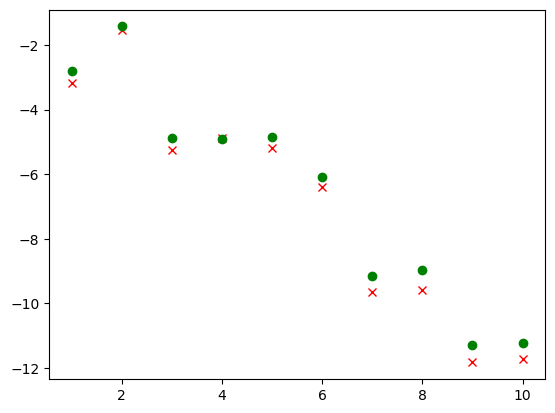

[6.63171145 1.19713415]
[6.65221222 2.0978696 ]
[6.61121068 0.29639869]
[[8.40563028e-03 3.69315384e-01]
 [3.69315384e-01 1.62264873e+01]]
14.104352419300245
29.483695608068743
2.8279781522500116
4.225917644224653
3.068901558283467
0.27460209302656147
7.596031610284889
7.172352323992818
24.310784517643174
23.258164937378528
[[214.079521    37.79688444]
 [ 37.79688444  10.06816588]]


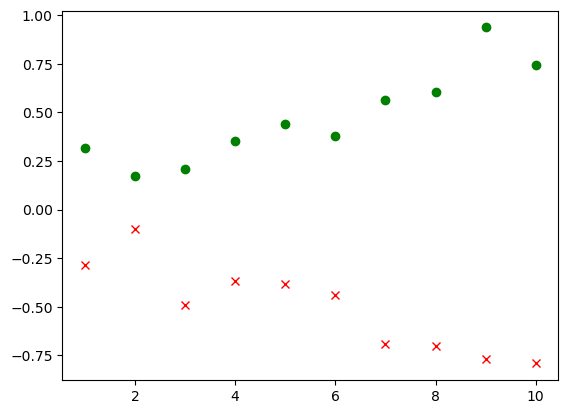

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn,rand
import scipy 

x1=np.arange(1,11);x1=1.2*x1+0.9*randn(1,10);
x2=0.3*x1+0.1+0.1*randn(1,10);
x3=x1+0.1*randn(1,10); 
x4=0.05*x3-0.1+0.2*randn(1,10)
Xa= np.concatenate( 
    (x1.T, x2.T),
    axis=1 );
Xb = np.concatenate( 
    (x3.T, x4.T),
    axis=1 );
X = np.concatenate( (Xa,Xb) )
plt.plot(Xa[:,0],Xa[:,1],'rx',Xb[:,0],Xb[:,1],'go')
plt.show()

# PCA
rxx=X.T @ X/20;
[d,v]=np.linalg.eig(rxx);
print(d)
# różnica do Matlaba, ponieważ w odwrotnej kolejności
# funkcja eig zwraca wartości własne (największa na 
# początku)
w=-v[:,0];
y=w @ X.T;
y
plt.plot(range(1,11),y[0:10],'rx',range(1,11),y[10:20],'go')
plt.show()

# LDA
m=np.mean(X,axis=0);
print(m)
m1=np.mean(X[0:10,:],axis=0);
m2=np.mean(X[10:,:],axis=0);
print(m1)
print(m2)

sb=(  10*(m1-m).reshape(2,1) @ (m1-m).reshape(1,2) 
    + 10*(m2-m).reshape(2,1)@(m2-m).reshape(1,2) )
sw=np.zeros( (2,2) )

print(sb)
for i in range(10):
    print((X[i,:]-m1) @ (X[i,:]-m1))
    sw = sw + ( (X[i,:]-m1).reshape(2,1) 
                 @ (X[i,:]-m1).reshape(1,2) 
            + (X[i+10,:]-m2).reshape(2,1) 
                 @ (X[i+10,:]-m2).reshape(1,2))

print(sw)

d,v = scipy.linalg.eigh(sb,b=sw)
# tu kolejność wartości własnych jest
# jak w Matlabie
w=-v[:,1];
y=w @ X.T;

plt.plot(range(1,11),y[0:10],'rx',range(1,11),y[10:20],'go')

In [114]:
#help(np.linalg.eigvals)

In [ ]:
# MATLAB

% Badanie ważności cech diagnostycznych
x1=1+randn(20,5);
x2=-2+0.2*randn(20,5);
x3=3+0.1*randn(20,5);
x=[x1;x2;x3];
d=[ones(20,1);2*ones(20,1);3*ones(20,1)];
Mdl = fitcensemble(x,d,'Method','Bag','NumLearningCycles',50);
imp = oobPermutedPredictorImportance(Mdl);   %Ważność cech
figure;
bar(imp);
title('Out-of-Bag Permuted Predictor Importance Estimates');
ylabel('Estimates');
xlabel('Predictors');
h = gca;
h.XTickLabel = Mdl.PredictorNames;
h.XTickLabelRotation = 90;
h.TickLabelInterpreter = 'none';


In [ ]:
# MATLAB

     load ionosphere;
    [ranks,weights] = relieff(X,Y,10);
    bar(weights(ranks));
    xlabel('Predictor rank');
    ylabel('Predictor importance weight');


In [115]:
# MATLAB

N = 100;
X = rand(N,20);
y = 1 + X(:,3)*5 + sin(X(:,9)./X(:,15) + 0.15*randn(N,1));
model = fsrnca(X,y,'Verbose',1,'Lambda',0.5/N);
figure()
plot(model.FeatureWeights,'ro')
grid on
xlabel('Feature index')
ylabel('Feature weight')
title ('Ważność cech diagnostycznych')

SyntaxError: invalid syntax (1280318043.py, line 3)